# Visa Approval Project

## Project Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

## Project Scope

The increasing number of applicants every year calls for a data-driven Machine Learning based solution that can help shortlist the candidates having higher chances of VISA approvalions. 
The scope of project are the following:
* Analyze the data provided
* Create a classification model to facilitate the process of visa approvals
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:

# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
va = pd.read_csv('/content/drive/My Drive/EasyVisa.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
data=va.copy()

## Data Overview

- Observations
- Sanity checks

### Viewing First and Last Five Rows

In [5]:
#Viewing the first five rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
#Viewing the last five rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understanding the Shape of the Dataset

In [7]:
data.shape

(25480, 12)

There are 25480 rows and 12 columns in the dataset

In [27]:
#stattistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About 90% of applications are for full time positions and at least 33% comes from US North West Region

###Checking the data types of the Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The dataset contains the following datatypes:


*   Object Data type: case_id, continent, education_of_employee, has_job-experience, requires_job_training, region_of_employment,unit_of_wage, full_time_position, case_status
*   integer data type: no_of_employee, yr_of_estab
*   float data type: prevailing_wage


There are no null values in the dataset.

We can convert the object type columns to categories converting "objects" to "category" reduces the data space required to store the dataframe





###Fixing the Datatypes

In [9]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [11]:
# now, rechecking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


The memory has reduced from 2.3MB to 2.0MB

Case_ID is an ID variable, has the whole 25480 unique variables and not useful for predictive modelling. So the column will be dropped


---



###Understanding the Data

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Average employees working in organizations seeking visa approval sits around 5,667 with maximum value around 602,069. There is a hign range and difference in mean and median indicating the presence of outliers.

Year of establishment for most organization seems to have values starting from 1800 and the latest year being 2016

Average prevailing wage is around 74,455.81 dollars, the 25% percentile is 35,015.48 dollars, 75% percentile is at 107,735.51 dollars and maxmimum_wage is 319,210.27dollars.


In [13]:
#Fixing negative values in the employee column
negative_values=data[data['no_of_employees']<0]

In [14]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].abs()## Write the function to convert the values to a positive number

In [15]:
#checking after engineering
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


There are no more negative value in the no of employee columns

In [16]:
#dropping of the case_id column because all its values are unique
data.drop(['case_id'],axis=1,inplace=True)

In [17]:
data.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018



There are 6 continents from where visa proponents come applying to USA and more than half are from Asia

Almost half of applicants have Bachelor's degree, a little above half have job exeperince but almost all would still require job training

Northeast seem to be the most frequented region of employment.

The most prevalent unit of wage is yearly and and almost all positions are full time.

Case_status is our target variable with records of 17018 out of 25480 and we want to analyse what factors affect if a visa application is 'certified' or 'denied' and create a prediction model based on significant drivers in the dataset.



###Dropping Non-value adding columns

### Looking at unique values of all categories

In [18]:
cols_cat=data.select_dtypes(['category'])

In [19]:
types = ['category']
cols_cat_columns = data.select_dtypes(include=types).columns

In [20]:
for i in cols_cat_columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

In [21]:
df2=data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df2, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        order=df2[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df2[predictor].nunique()
    sorter = df2[target].value_counts().index[-1]
    tab1 = pd.crosstab(df2[predictor], df2[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df2[predictor], df2[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Observation on Education of Employee

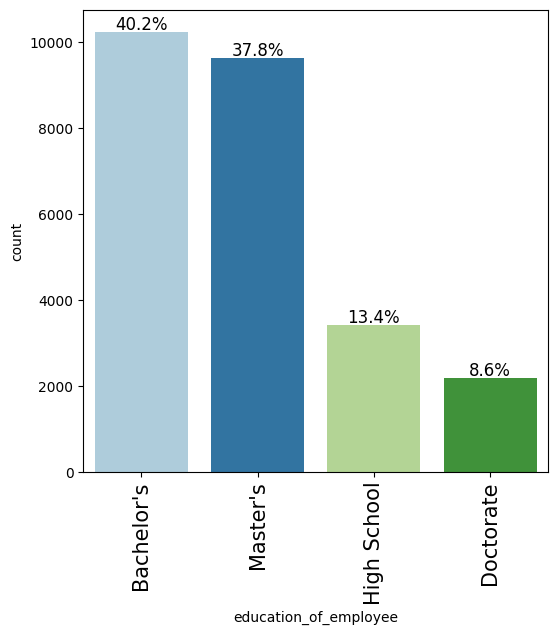

In [25]:
labeled_barplot(df2, "education_of_employee", perc=True)

Bachelor's degree ranks highest at 40.2% followed closely by Master's degree level of education

### Observation on Number of Employee

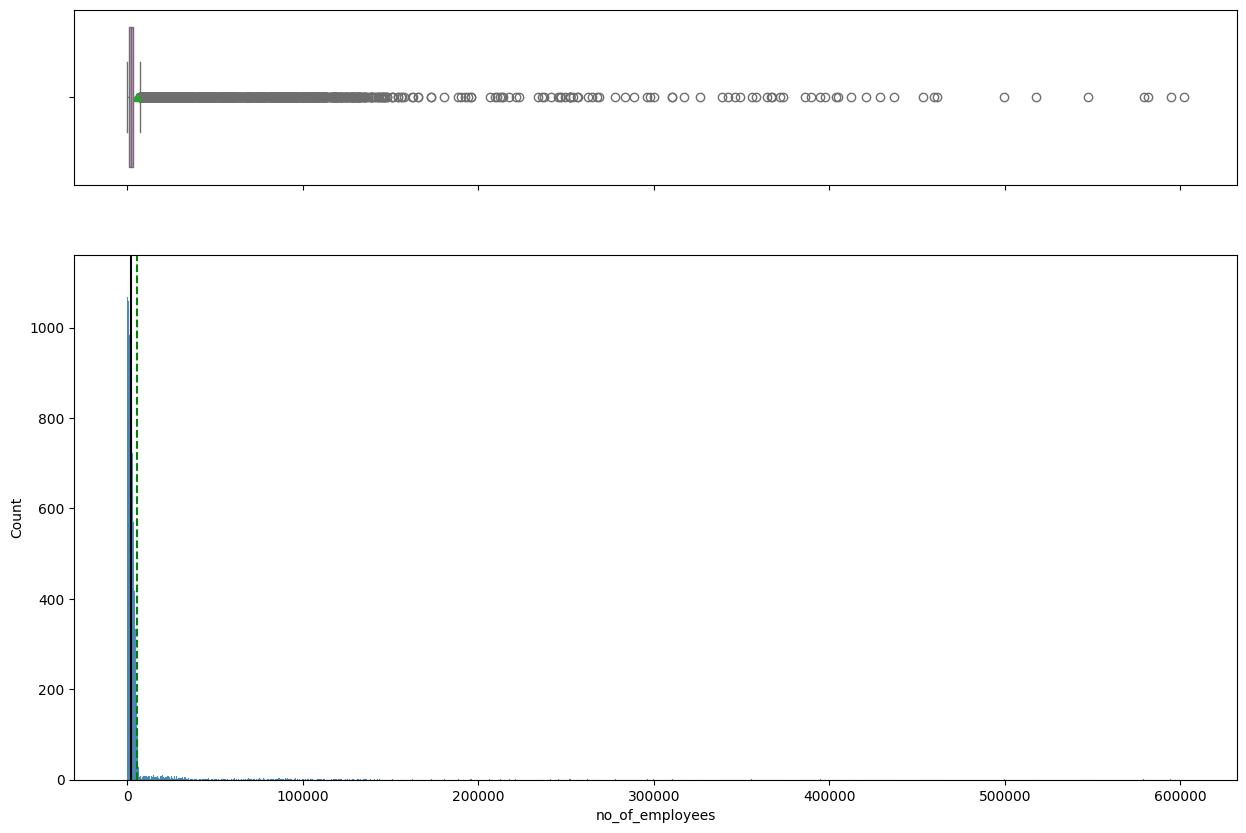

In [ ]:
histogram_boxplot(df2,'no_of_employees')

Number of employee seems to range from 0 to 100,000. The distribution is skewed to the right and has lots of outliers

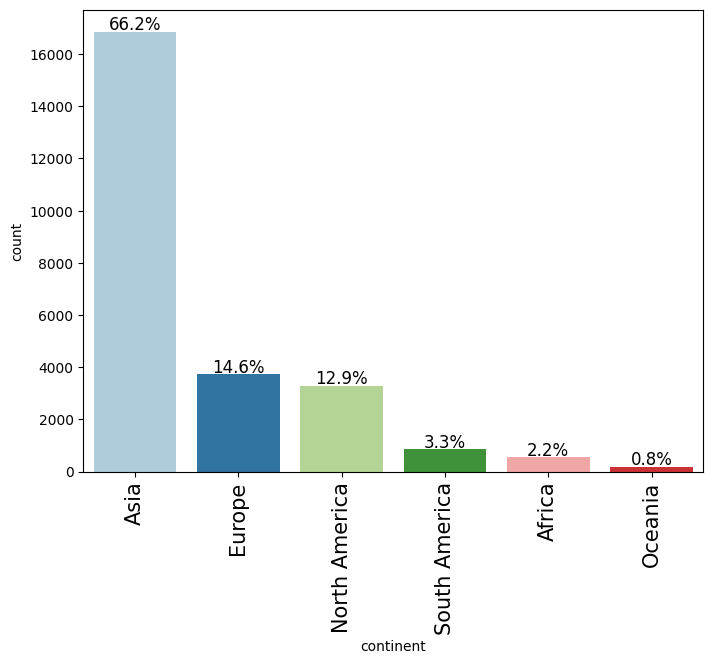

In [ ]:
labeled_barplot(df2, "continent", perc=True)

Asia with 66.2% has the has count in visa application

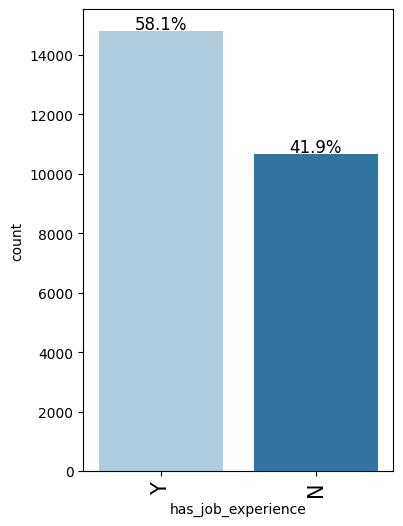

In [ ]:
labeled_barplot(df2, "has_job_experience", perc=True)

Applicant with job experience is a criteria that ranked 58.1% higher than applicants with no job experience.

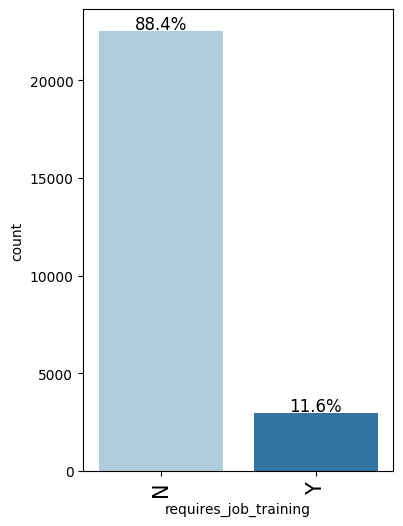

In [ ]:
labeled_barplot(df2, "requires_job_training", perc=True)

Applicant not requiring job training is a criteria that ranked with 88.4% higher than applicants requiring job training at 11.6%.

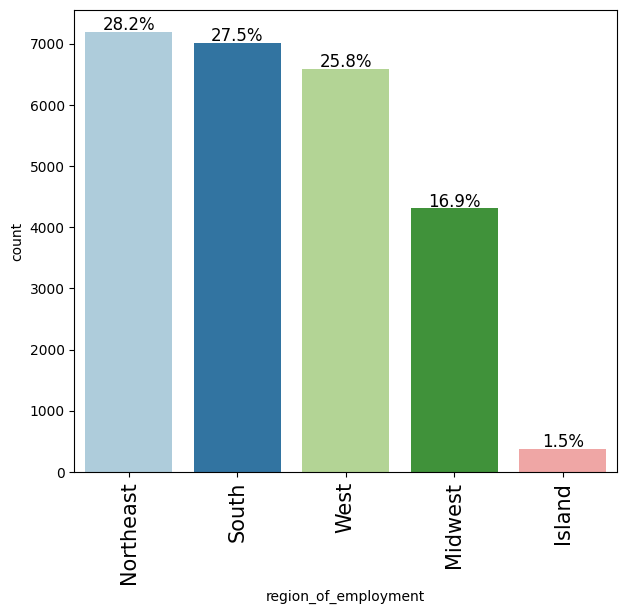

In [ ]:
labeled_barplot(df2, "region_of_employment", perc=True)

Northeast region of US (28.2%) ranked higher than other region of employment:

South - 27.5%

West - 25.8%

Midwest - 16.9%

Island - 1.5%

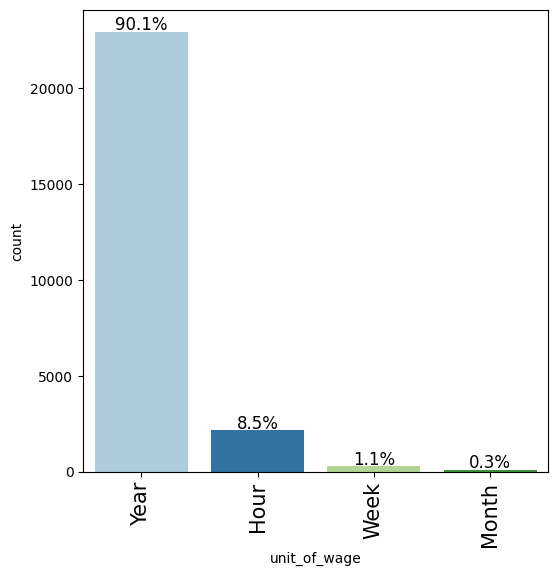

In [ ]:
labeled_barplot(df2, "unit_of_wage", perc=True)

The year is the most popular measure of 'unit of wage'

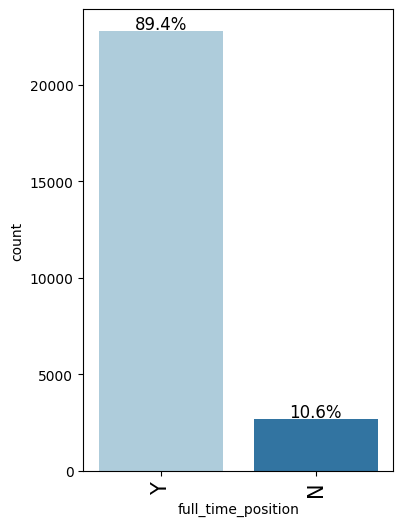

In [ ]:
labeled_barplot(df2, "full_time_position", perc=True)

Full-time position is the most-sought after with 89.4%

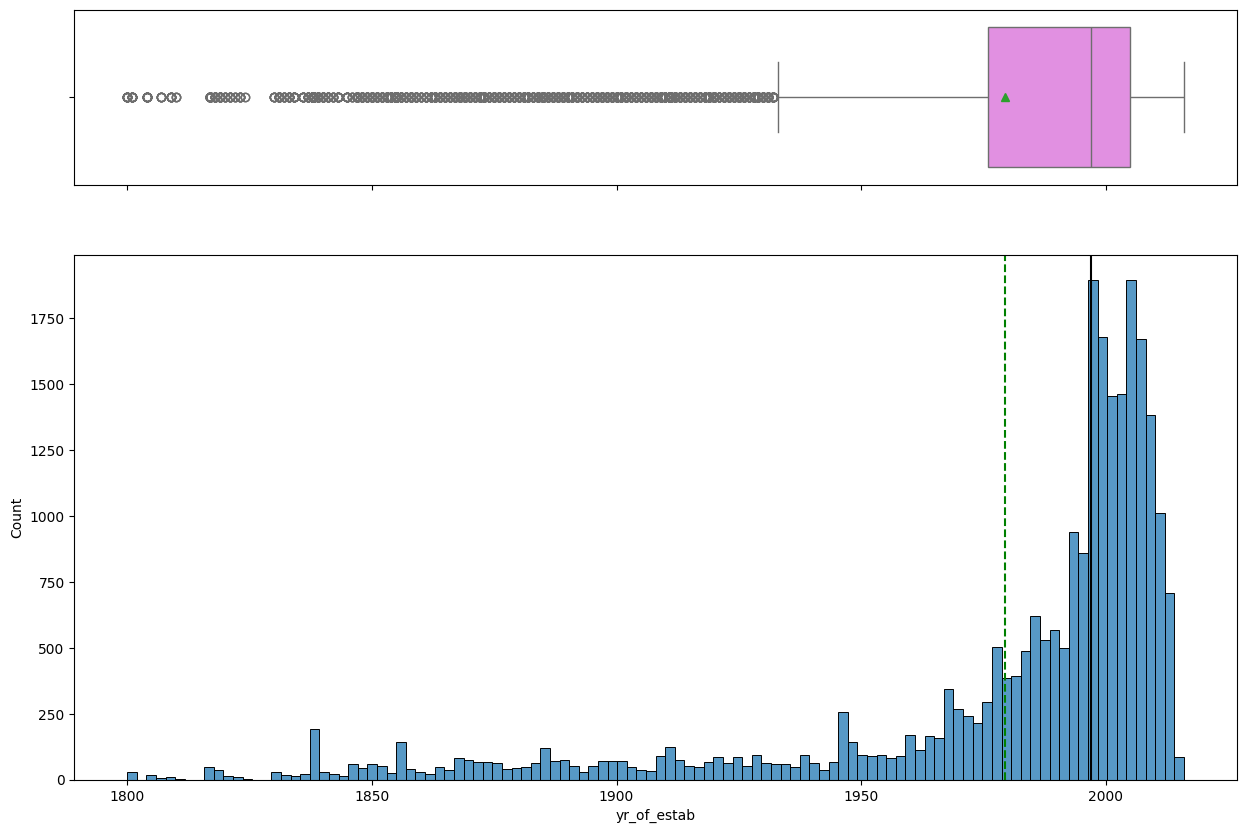

In [ ]:
histogram_boxplot(df2,'yr_of_estab')

The  year of establishment distribution is skewed to the left starting from 1800 and reached highest number of count in 2000.

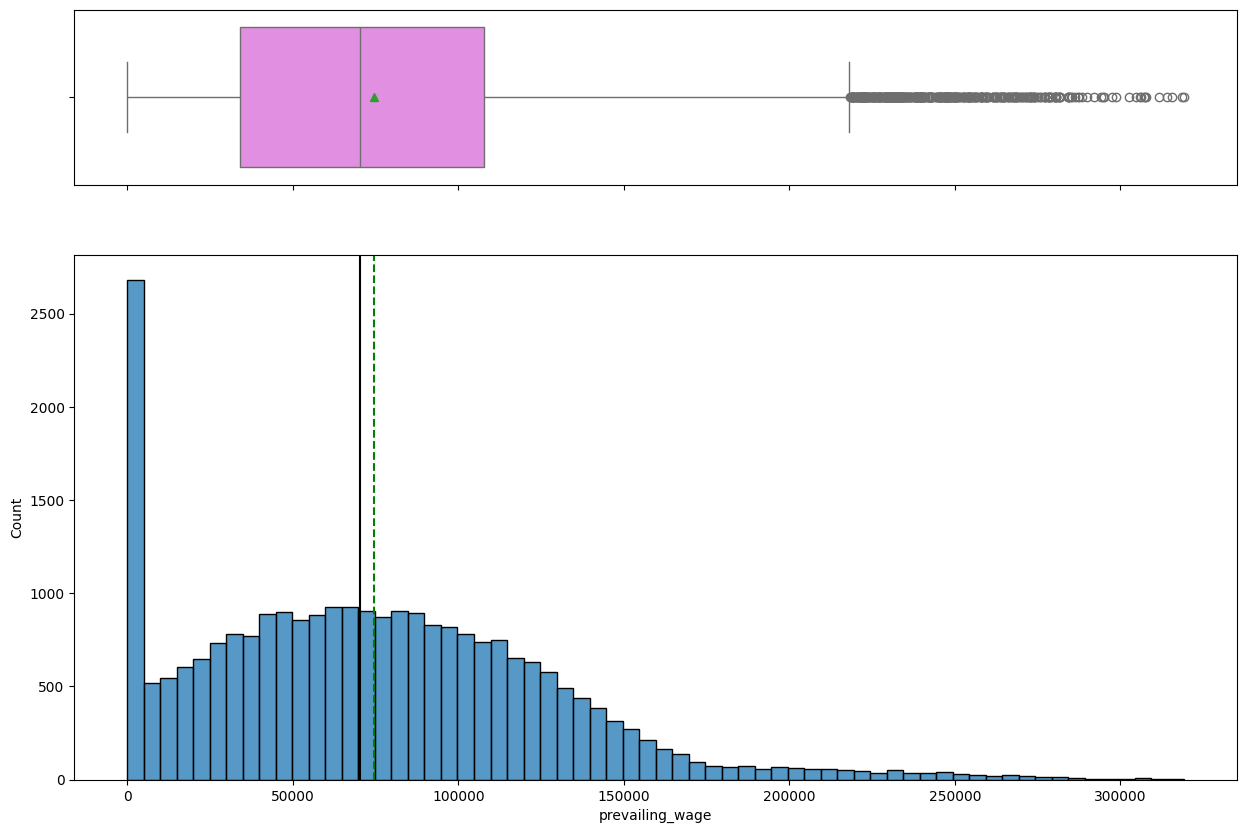

In [ ]:
histogram_boxplot(df2,'prevailing_wage')

Average prevailing_wage is USD70,308.00 and the distribution is rightly screwed with outlier more than USD 300,000.00

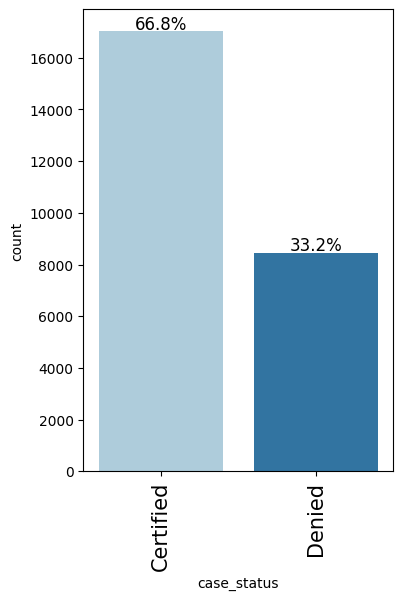

In [ ]:
labeled_barplot(df2, "case_status", perc=True)

Approved application figure stands at 66.8% compared to the number of applications denied that is around 33.2%

### Bivariate Analysis

###Correlation Check

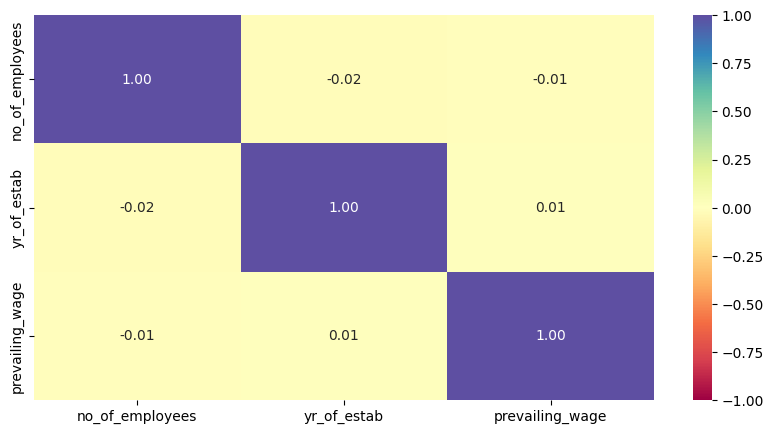

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

There is no observed correlation between between the variables

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


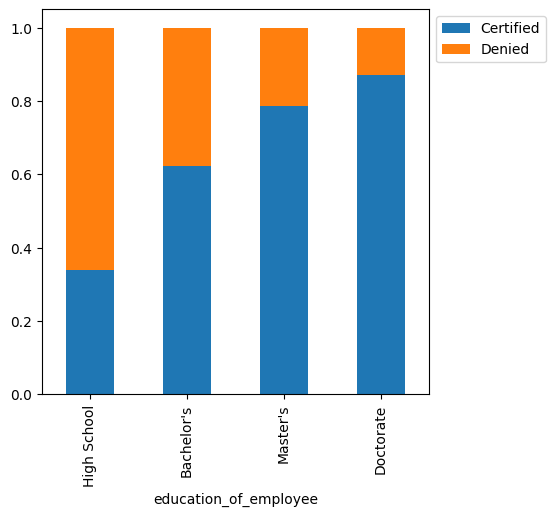

In [ ]:
#Analysing education with visa certification
stacked_barplot(df2,"education_of_employee","case_status")

Out of 25280 application, 17018 were educated with at least high-school level education

Doctorate education have 87% chance of being certified and High school has the lowest chance of 34%, meaning the higher an applicant cerification,the more chance of getting certified

###Analysing education type certification

In [26]:
# Given data
total_certifications = 17018
doctorate_certified = 1912
master_certified = 7575
high_school_certified = 1164
bachelor_certified = 6367

# Calculate percentage of certifications for each education level
percentage_doctorate_certified = (doctorate_certified / total_certifications) * 100
percentage_master_certified = (master_certified / total_certifications) * 100
percentage_high_school_certified = (high_school_certified / total_certifications) * 100
percentage_bachelor_certified = (bachelor_certified / total_certifications) * 100

# Print individual percentages
print("Percentage of doctorate certifications:", round(percentage_doctorate_certified, 2), "%")
print("Percentage of master certifications:", round(percentage_master_certified, 2), "%")
print("Percentage of high school certifications:", round(percentage_high_school_certified, 2), "%")
print("Percentage of bachelor certifications:", round(percentage_bachelor_certified, 2), "%")

Percentage of doctorate certifications: 11.24 %
Percentage of master certifications: 44.51 %
Percentage of high school certifications: 6.84 %
Percentage of bachelor certifications: 37.41 %


Out of 17018 certifications, applicants with master's degree got the highest certications, further analysis to discover other factors affecting this may be required.

###How does the visa status vary across different continents?


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


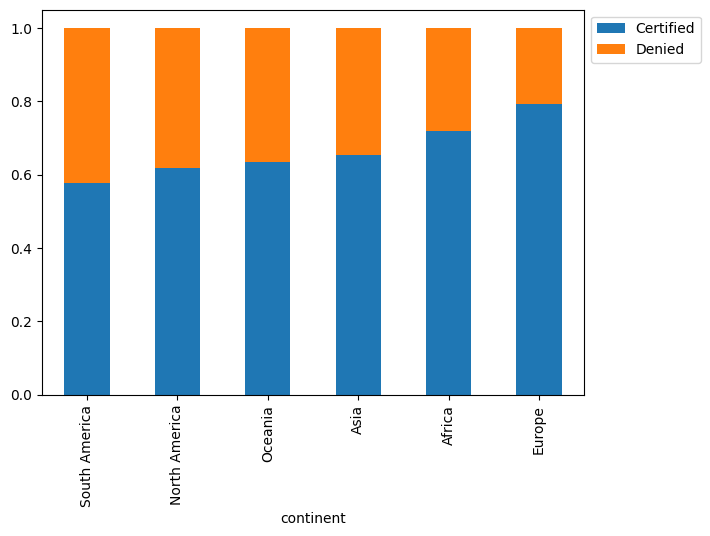

In [ ]:
#Analysing visa_status vary across different continents
stacked_barplot(df2,"continent","case_status")


Europe has the highest percentage of application approved followed by Africa,Asia and Oceania with South America being the lowest

However Asia has the highest number of application

###How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


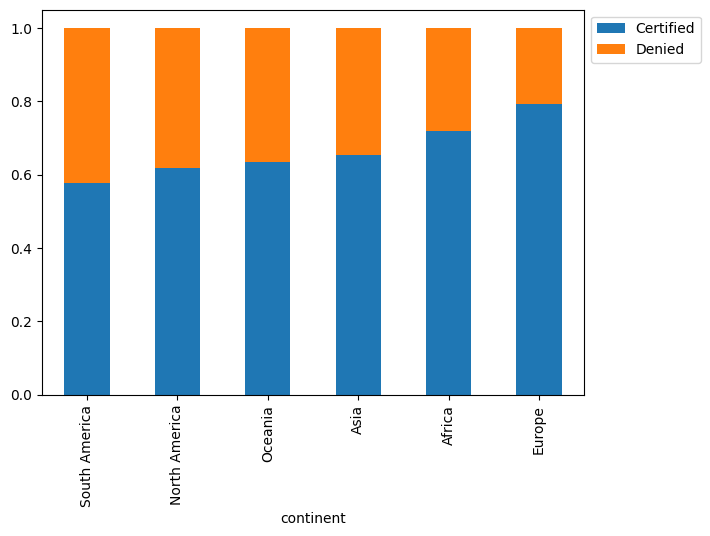

In [29]:
# stacked barplot for continent and case status
stacked_barplot(df2, "continent", "case_status")


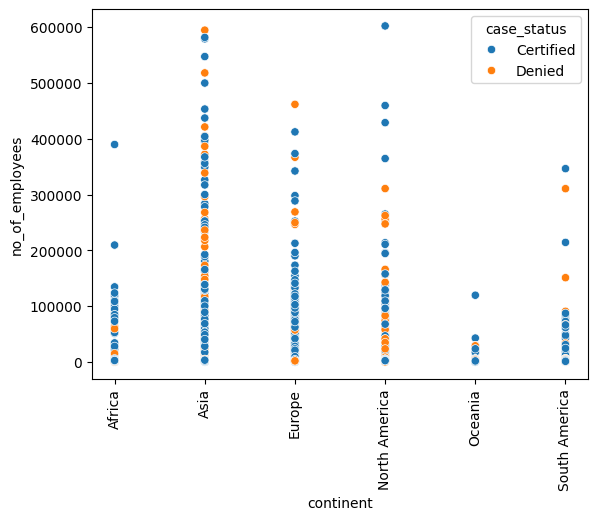

In [ ]:
#showing plot to analyse visa status across different continents
sns.scatterplot(x='continent', y='no_of_employees',hue= 'case_status',data=df2)
plt.xticks(rotation=90);
plt.show ()

Applications from Europe have higher percentage of certification and Oceania has the lowest number of applications

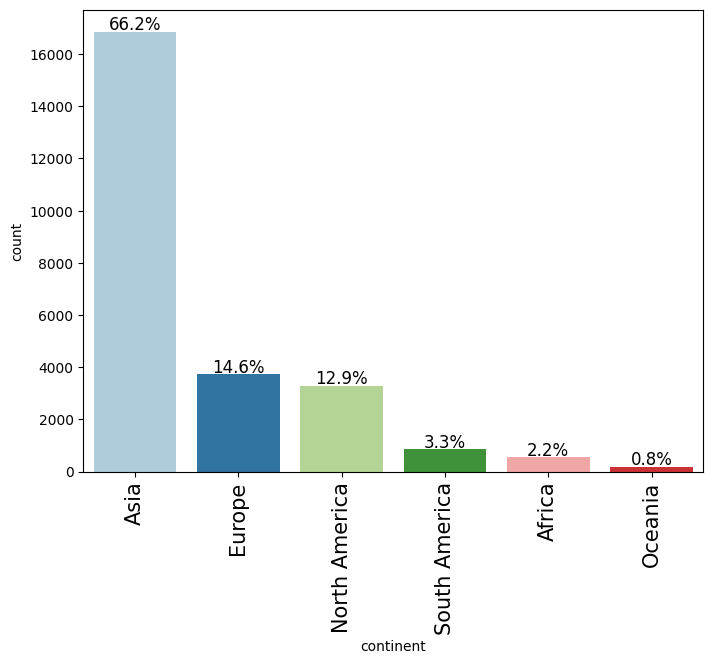

In [ ]:
## plotting to see distribution of of visa applications in different continent
labeled_barplot(df2, "continent", perc=True,)

### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


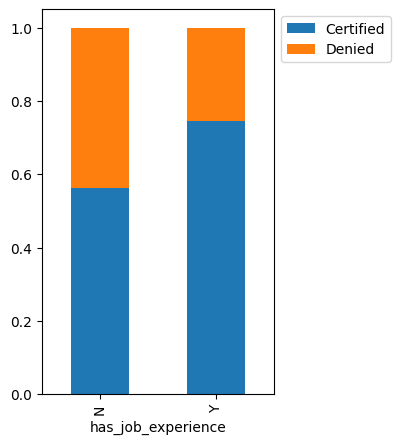

In [30]:
#stacked barplot to analyse job experience and case status
stacked_barplot(df2,"has_job_experience","case_status")


Applications with job experiences has 75% chance of being certified and 58% if without work experience

### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?




case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


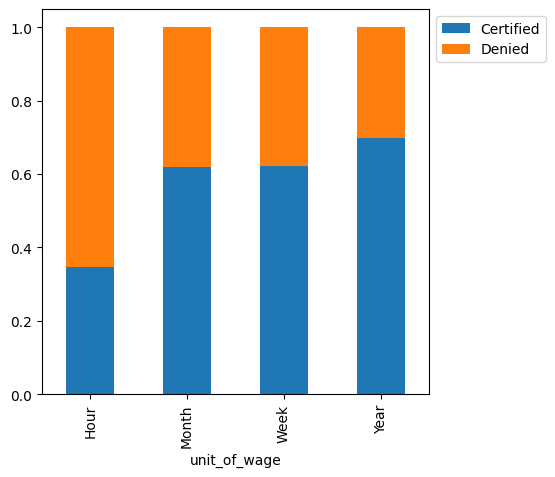

In [ ]:
#Analysing pay units with visa certification
stacked_barplot(df2,"unit_of_wage","case_status")

Most applicants with yearly rates are certified. weekly and montly rates seems more likely to be certified

In [35]:
# checking if the prevailing wage is similar across all the regions of the US
df2.groupby("region_of_employment")["prevailing_wage"].mean()

region_of_employment
Island       91712.750760
Midwest      91696.741794
Northeast    67872.662819
South        74040.545216
West         69832.628698
Name: prevailing_wage, dtype: float64

<Axes: xlabel='region_of_employment', ylabel='prevailing_wage'>

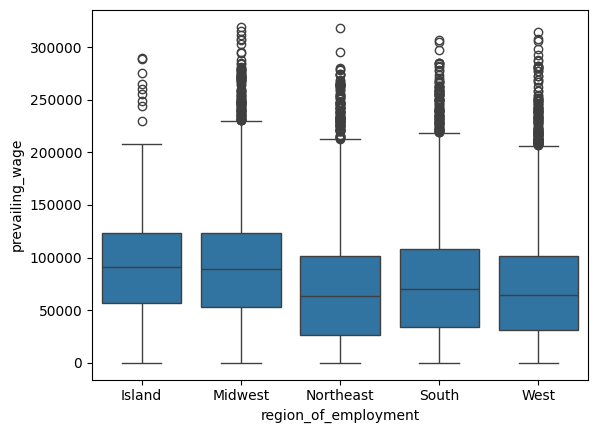

In [38]:
#checking if the prevailing wage is similar across all the regions of the US
sns.boxplot(x="region_of_employment", y="prevailing_wage", data=df2)



The prevailing wage is almost the same for Island and Midwest Regions, higher compared to others.

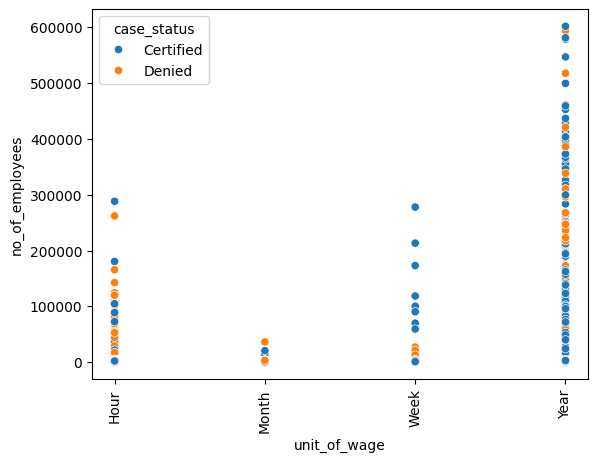

In [ ]:
#showing plot to analyse visa status across different units of wages
sns.scatterplot(x='unit_of_wage', y='no_of_employees',hue= 'case_status',data=df2)
plt.xticks(rotation=90);
plt.show ()

Most postitions are full time and so yearly unit of payments got more visa certification

### The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?



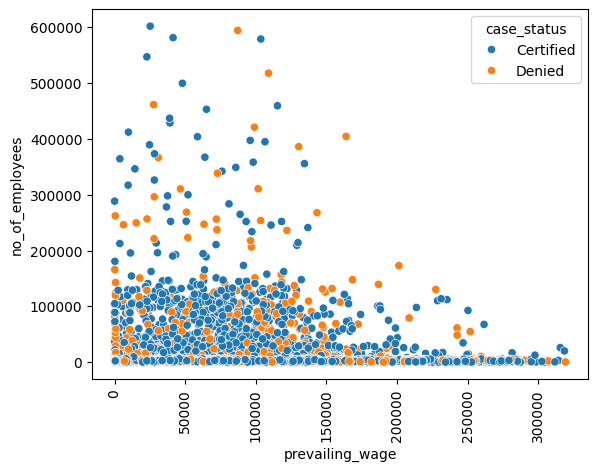

In [ ]:
sns.scatterplot(x='prevailing_wage', y='no_of_employees',hue= 'case_status',data=df2)
plt.xticks(rotation=90);
plt.show ()

<Axes: xlabel='case_status', ylabel='prevailing_wage'>

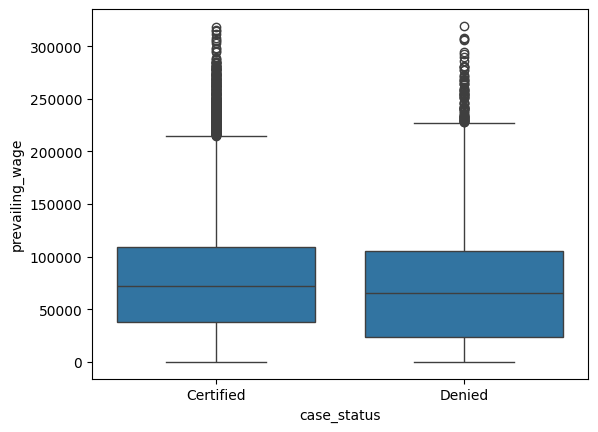

In [107]:
#find distribution for prevailing wage and case status
sns.boxplot(x="case_status", y="prevailing_wage", data=df2)

The difference bettween application denied or certified based on prevailing wage is marginal.

Further analysis required to find corellation and significance of these parameters

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing value treatment

In [ ]:
#Analysing if there are any missing value
df2.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the dataset

Outlier Detection and Treatment

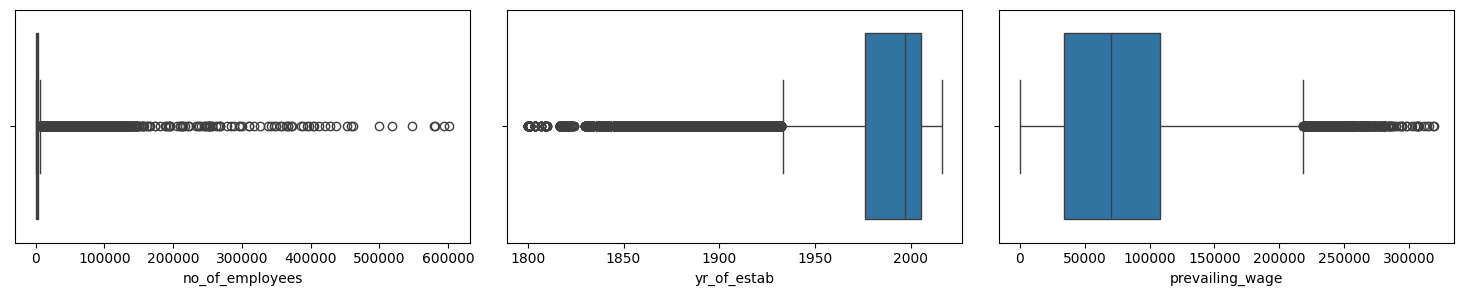

In [ ]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

We will not treat outliers because we believe the outliers are all real values



## EDA

- It is a good idea to explore the data once again after manipulating it.

In [39]:
#describing the dataset again
df2.describe()


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Data Preparation for Modeling**

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [40]:
#creating a new dataframe
#make a copy first
df3=df2.copy()

In [41]:
unique_values = df3['case_status'].unique()
print(unique_values)

['Denied', 'Certified']
Categories (2, object): ['Certified', 'Denied']


In [42]:
# encoding the certified and denied class
df3["case_status"] = df3["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)

In [43]:
# checking encoding for case status
df3["case_status"].value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

In [44]:
#Create a dataframe of categorical data
cols_cat=df3.select_dtypes(['category'])

In [45]:
# Get percentage breakdown of categorial variables
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in continent are :
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
**************************************************
Unique values in education_of_employee are :
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
**************************************************
Unique values in has_job_experience are :
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
**************************************************
Unique values in requires_job_training are :
N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64
**************************************************
Unique values in region_of_employment are :
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: re

In [46]:
#drop case status from the data
X = df3.drop(['case_status'],axis=1)
y = df3['case_status']

In [47]:
#create dummies for X
X = pd.get_dummies(X,drop_first=True)

In [48]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=1)


In [49]:
print(X_train.dtypes)
print(y_train.dtypes)

no_of_employees                        int64
yr_of_estab                            int64
prevailing_wage                      float64
continent_Asia                         uint8
continent_Europe                       uint8
continent_North America                uint8
continent_Oceania                      uint8
continent_South America                uint8
education_of_employee_Doctorate        uint8
education_of_employee_High School      uint8
education_of_employee_Master's         uint8
has_job_experience_Y                   uint8
requires_job_training_Y                uint8
region_of_employment_Midwest           uint8
region_of_employment_Northeast         uint8
region_of_employment_South             uint8
region_of_employment_West              uint8
unit_of_wage_Month                     uint8
unit_of_wage_Week                      uint8
unit_of_wage_Year                      uint8
full_time_position_Y                   uint8
dtype: object
category


In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


In [51]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


Around 67% of observations belongs to class 1 (Certified)

Around 33% of observation belongs to class 1 (Denied)

All is preserved in the train and test sets


In [52]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [53]:
y_test.value_counts(1)

1    0.677917
0    0.322083
Name: case_status, dtype: float64

### Model Evaluation Criterion

Model can make wrong predictions as:

Model predicts that the visa application will get certified but in reality, the visa application should get denied.

Model predicts that the visa application will not get certified but in reality, the visa application should get certified.
Which case is more important?

Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

How to reduce the losses?

F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

We will use balanced class weights so that model focuses equally on both classes.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot the confusion matrix.


In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Build the first Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [58]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training and testing set

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66405  0.742184   0.757385  0.749708


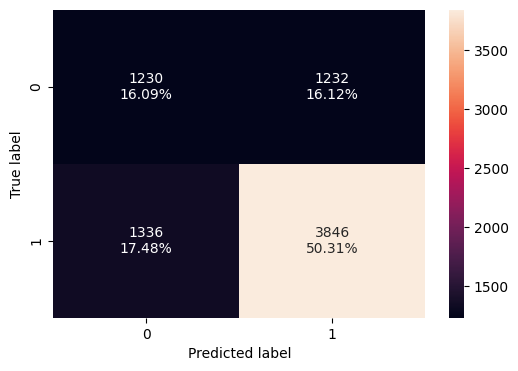

In [59]:
#Calculating different metrics
decision_tree_perf_train=model_performance_classification_sklearn(model0,X_train,y_train)
print("Training performance:\n",decision_tree_perf_train)
decision_tree_perf_test=model_performance_classification_sklearn(model0,X_test,y_test)
print("Testing performance:\n",decision_tree_perf_test)

#Creating confusion matrix
confusion_matrix_sklearn(model0,X_test,y_test)

###Hyperparameter Tuning - Decision Tree

In [60]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [61]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

###Checking model performance on training & testing set

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66248  0.727132   0.763681  0.744958


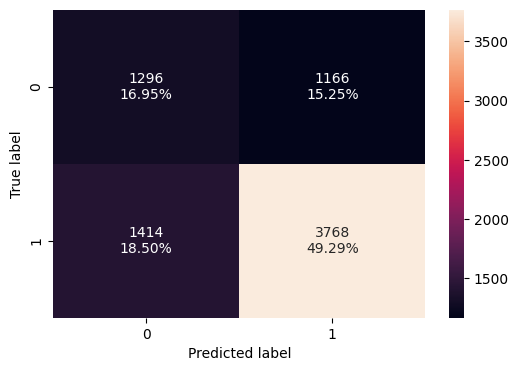

In [62]:
#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(dtree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree,X_test,y_test)

###HyperTuning dtree_estimator model

In [63]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

### Checking model performance on training and testing set

Training performance:
    Accuracy    Recall  Precision        F1
0   0.70795  0.931734   0.714758  0.808949
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.717295  0.931301   0.727794  0.817066


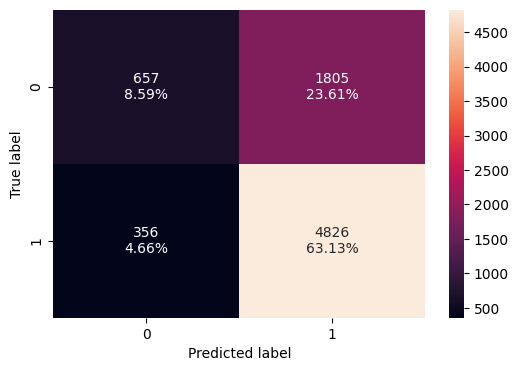

In [64]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

## Building Bagging and Boosting models

In [65]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

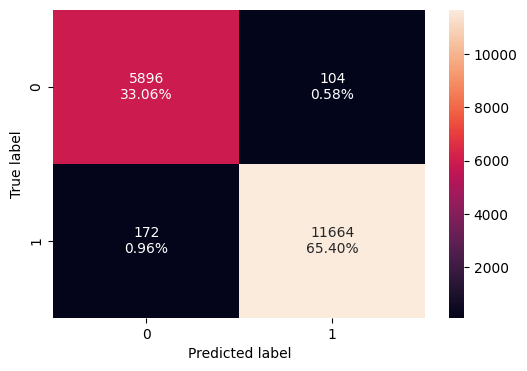

In [66]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984526  0.985468   0.991162  0.988307
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.696102  0.773061   0.777411  0.77523


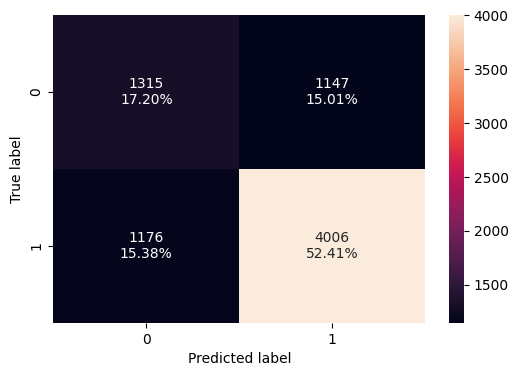

In [67]:
#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

###Hyperparameter Tuning - Bagging Classifier

In [68]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.8, n_estimators=100,
                  random_state=1)

### Checking model performance on training and testing set

Training performance:
    Accuracy  Recall  Precision       F1
0    0.9963     1.0   0.994455  0.99722
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.930143   0.731189  0.818753


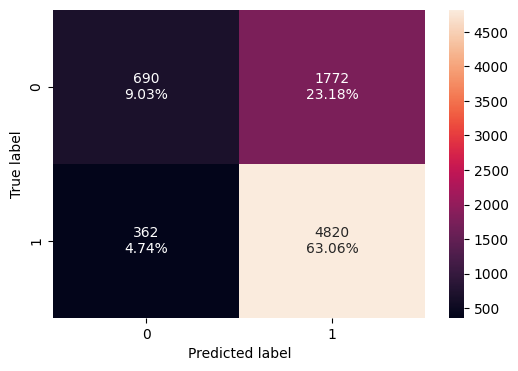

In [69]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

### Random Forest

In [70]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

### Checking Model Performance on Training and Testing Set

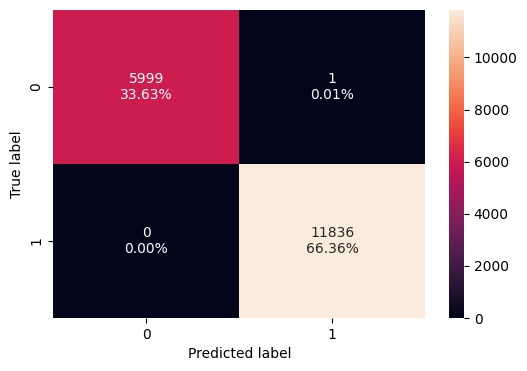

In [71]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.727368  0.833655   0.779502  0.80567


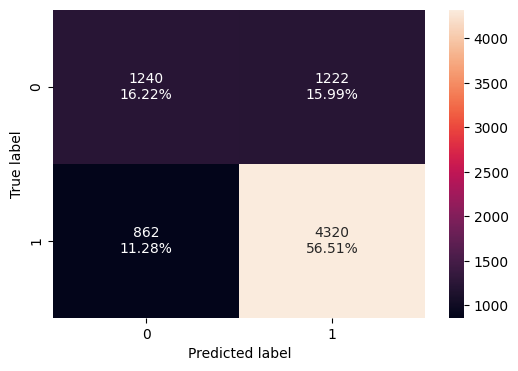

In [100]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

### Hyperparameter Tuning -Random Forest

In [72]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search the grid_obj on the train data
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=30,
                       oob_score=True, random_state=1)

###Checking Performance on Training and Testing Set

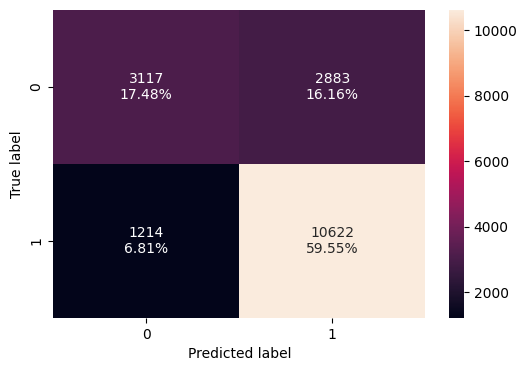

In [73]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

###Checking Model Perfomance on Training and Testing Set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.770296  0.897432   0.786524  0.838325
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748038  0.878232   0.778481  0.825354


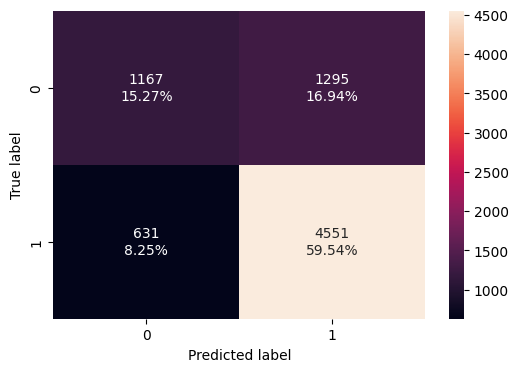

In [74]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

### Boosting - Model Building and Hyperparameter Tuning

###AdaBoost Classifier

In [75]:
#creating AdaBoost Classifier
ab_classifier= AdaBoostClassifier(random_state=1)

#fitting the model on the training data
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

##Checking Model Performance on Training and Testing set

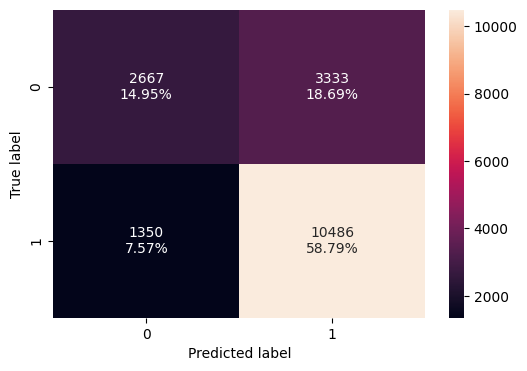

In [76]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


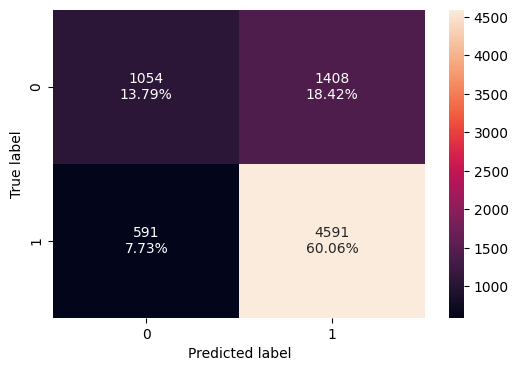

In [77]:
#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

###Hyperparameter Tuning - AdaBoost Classifier

In [78]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

###Checking Model Performance on Training and Testing Set

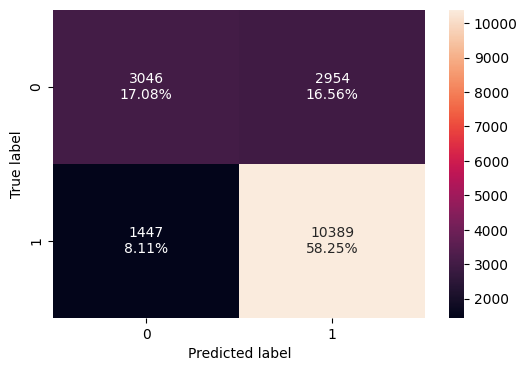

In [79]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751047  0.873022   0.784191  0.826226


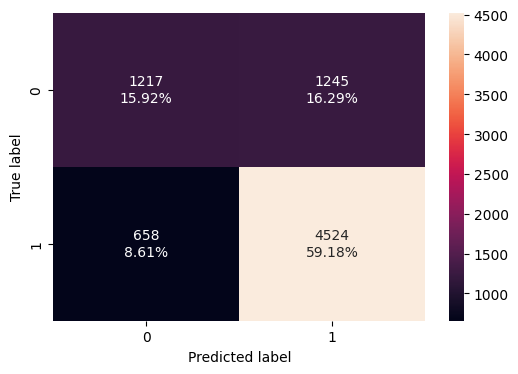

In [80]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

###Gradient Boosting Classifer

In [81]:
#creat gradient boosting classifer model
gb_classifier=GradientBoostingClassifier(random_state=1)

#fitting the model on the training data
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

###Checking Model Performance on Training and Testing Set

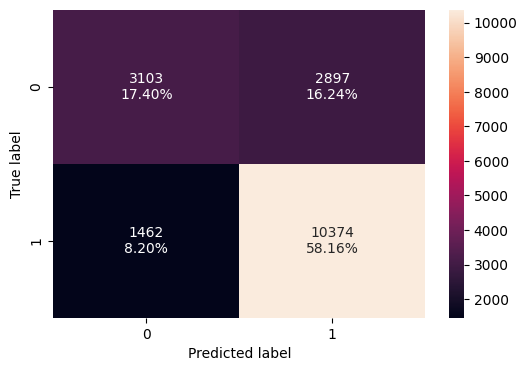

In [82]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


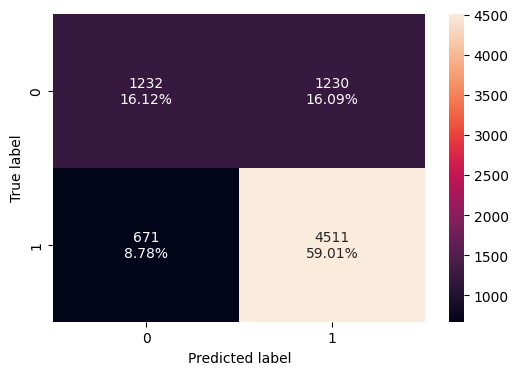

In [83]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

###Important Features

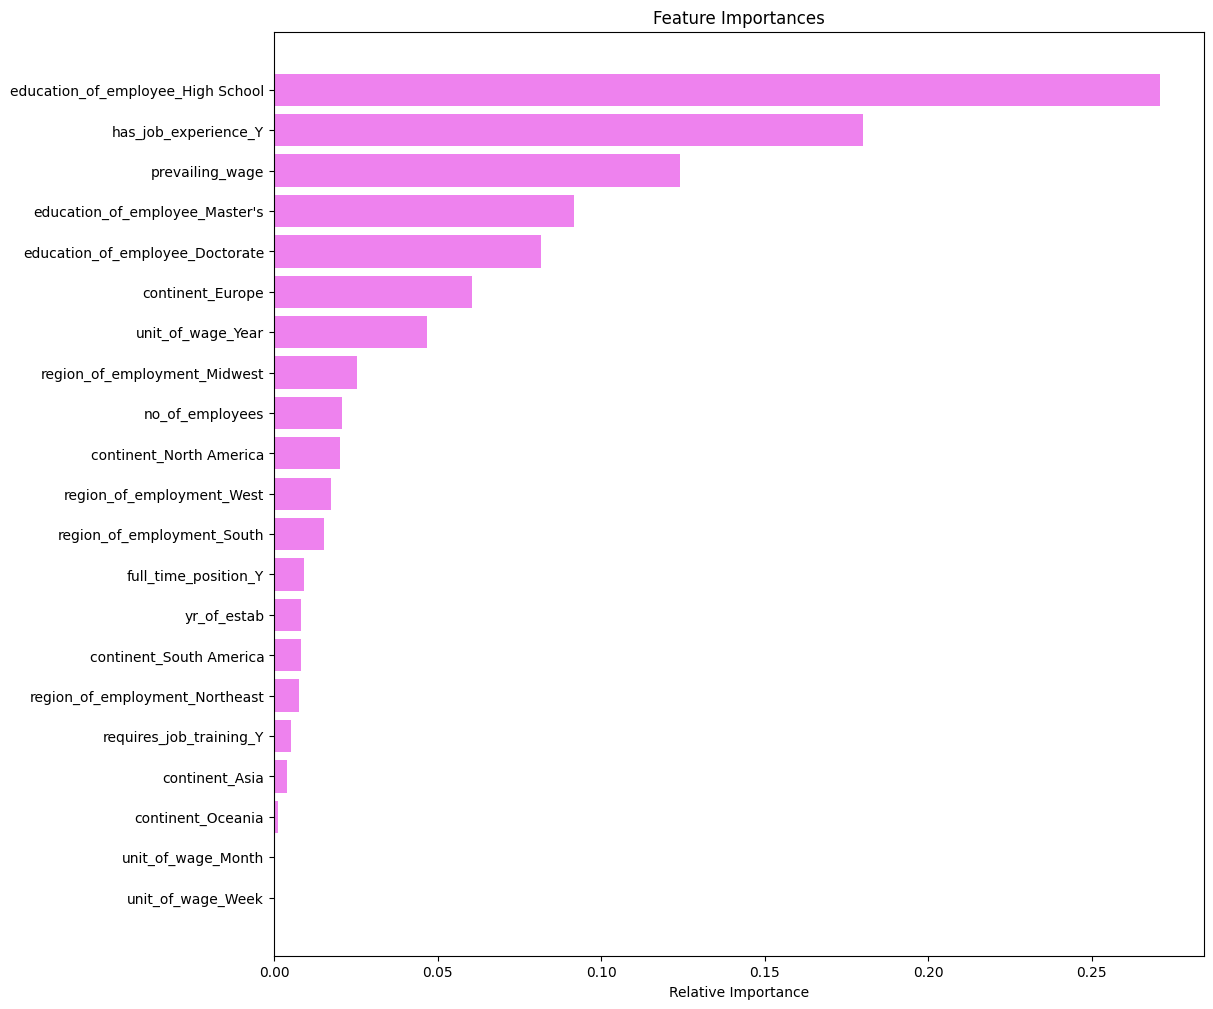

In [84]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###Hyperparameter Tuning - Gradient Boosting Classifier

In [85]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.8,
                           n_estimators=75, random_state=1, subsample=0.7)

###Checking Model Performance on Training and Testing Set

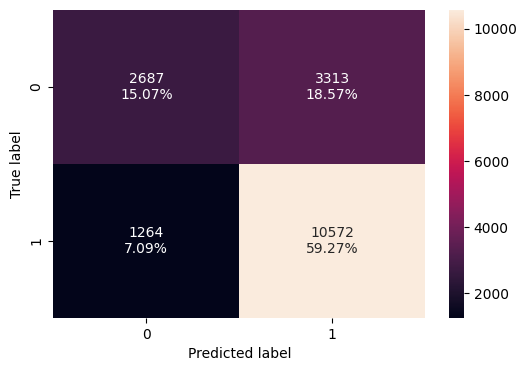

In [86]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.743384  0.893207   0.761397  0.822052
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744244  0.888267   0.769861  0.824836


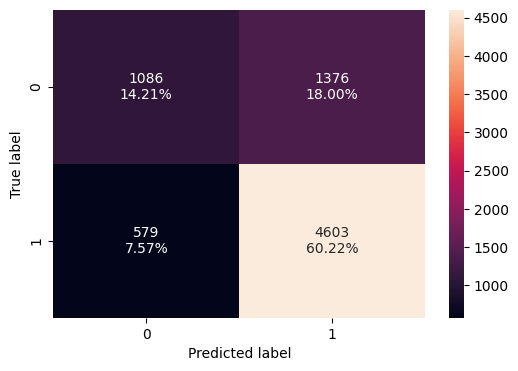

In [87]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

###XGBoost Classifier

In [88]:
#build XGBoost Model
xgb_classifier=XGBClassifier(random_state=1)

#fitting the model on the training data
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

###Checking Model Performance on Training and Testing Set

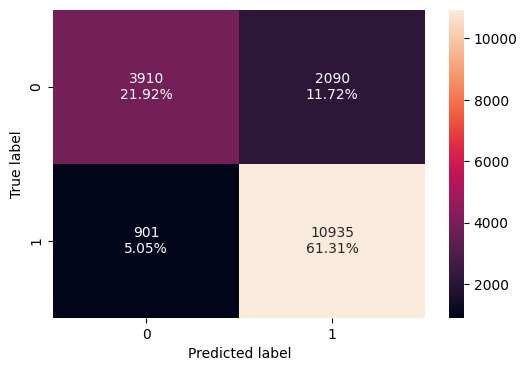

In [89]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.832305  0.923876   0.839539  0.879691
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.733909  0.85411   0.775947  0.813155


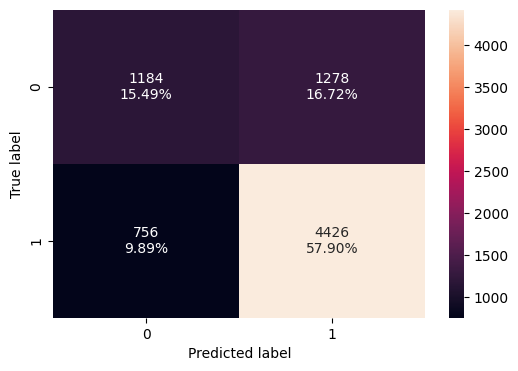

In [90]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

###Hyperparameter Tuning - XGBoost Classifier

In [91]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

###Checking Model Performnce on Testing and Training Set

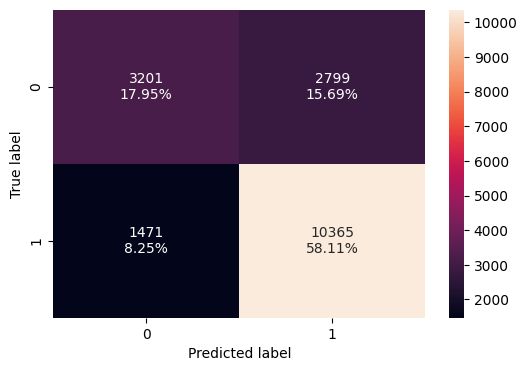

In [92]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision      F1
0  0.760597  0.875718   0.787375  0.8292
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.752486  0.864917   0.789919  0.825718


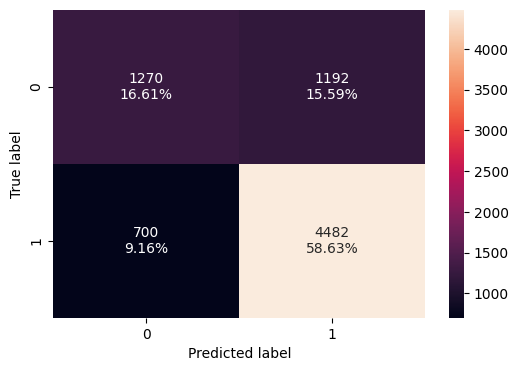

In [93]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

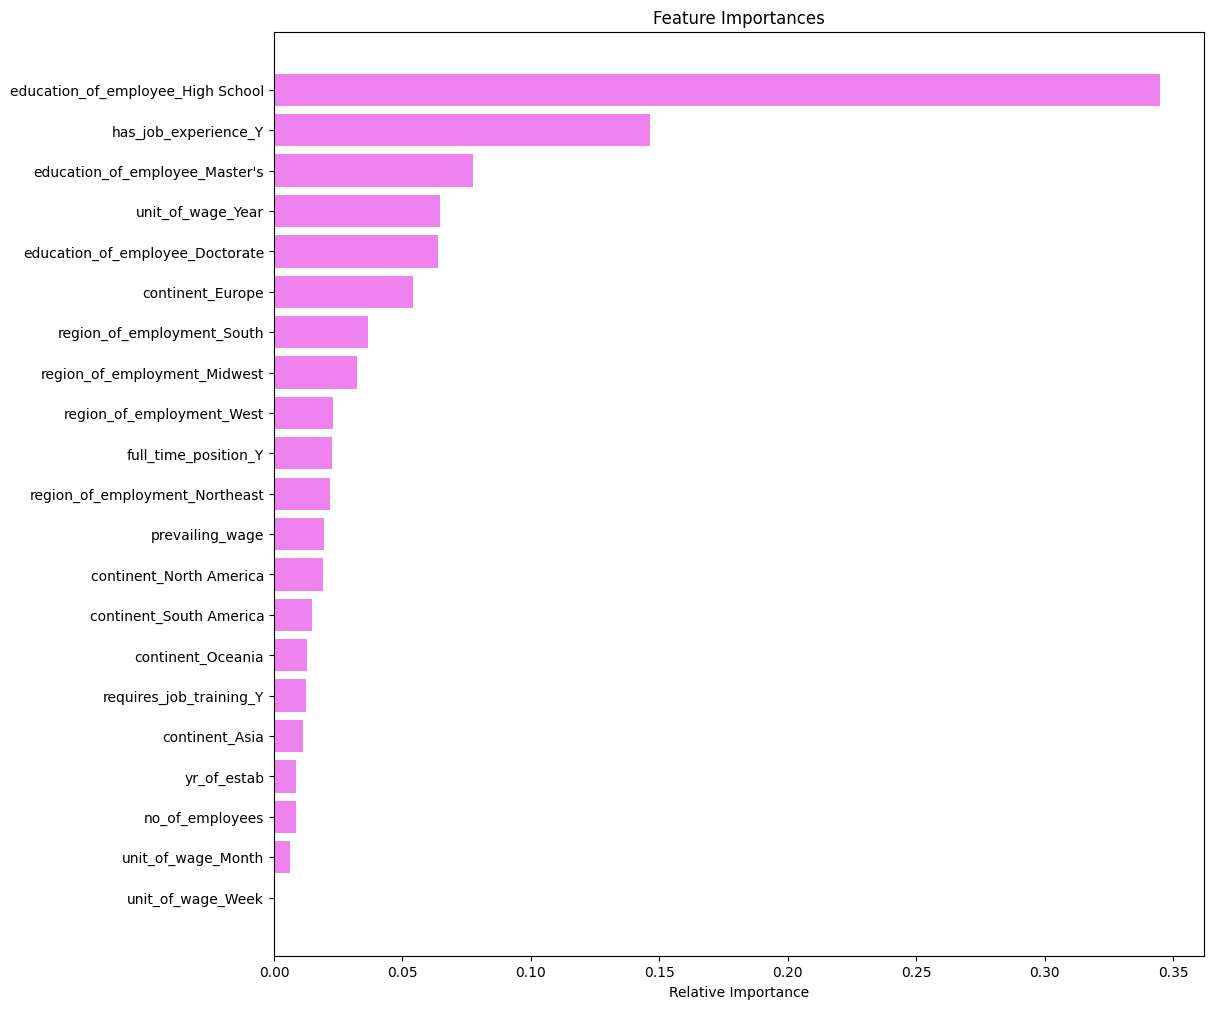

In [94]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###Stacking Classifier

In [95]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

#use estimators and final estimators
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
#fit Stacking Classifier on the train data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.8,
                                                           n_estimators=75,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=5,
                                                       n_estimators=30,
                                                       oob_score=Tru...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=75, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

###Checking Model Performance on Training and Testing Model

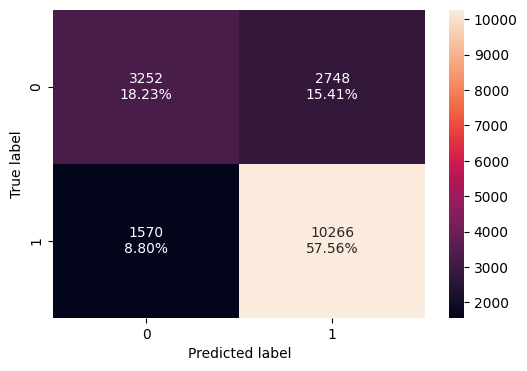

In [96]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757905  0.867354   0.788843  0.826237
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.750654  0.855461   0.793023  0.82306


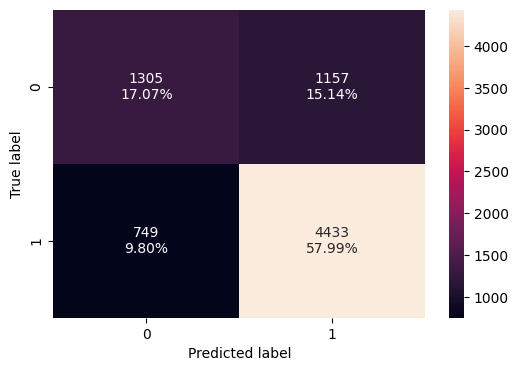

In [97]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

###Model Performance Comparison and Final Model Selection

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.707950,0.984526,0.996300,0.999944,0.770296,0.737441,0.753252,0.755607,0.743384,0.832305,0.760597,0.757905
Recall,1.0,0.931734,0.985468,1.000000,1.000000,0.897432,0.885941,0.877746,0.876479,0.893207,0.923876,0.875718,0.867354
Precision,1.0,0.714758,0.991162,0.994455,0.999916,0.786524,0.758810,0.778611,0.781704,0.761397,0.839539,0.787375,0.788843
F1,1.0,0.808949,0.988307,0.997220,0.999958,0.838325,0.817462,0.825211,0.826383,0.822052,0.879691,0.829200,0.826237


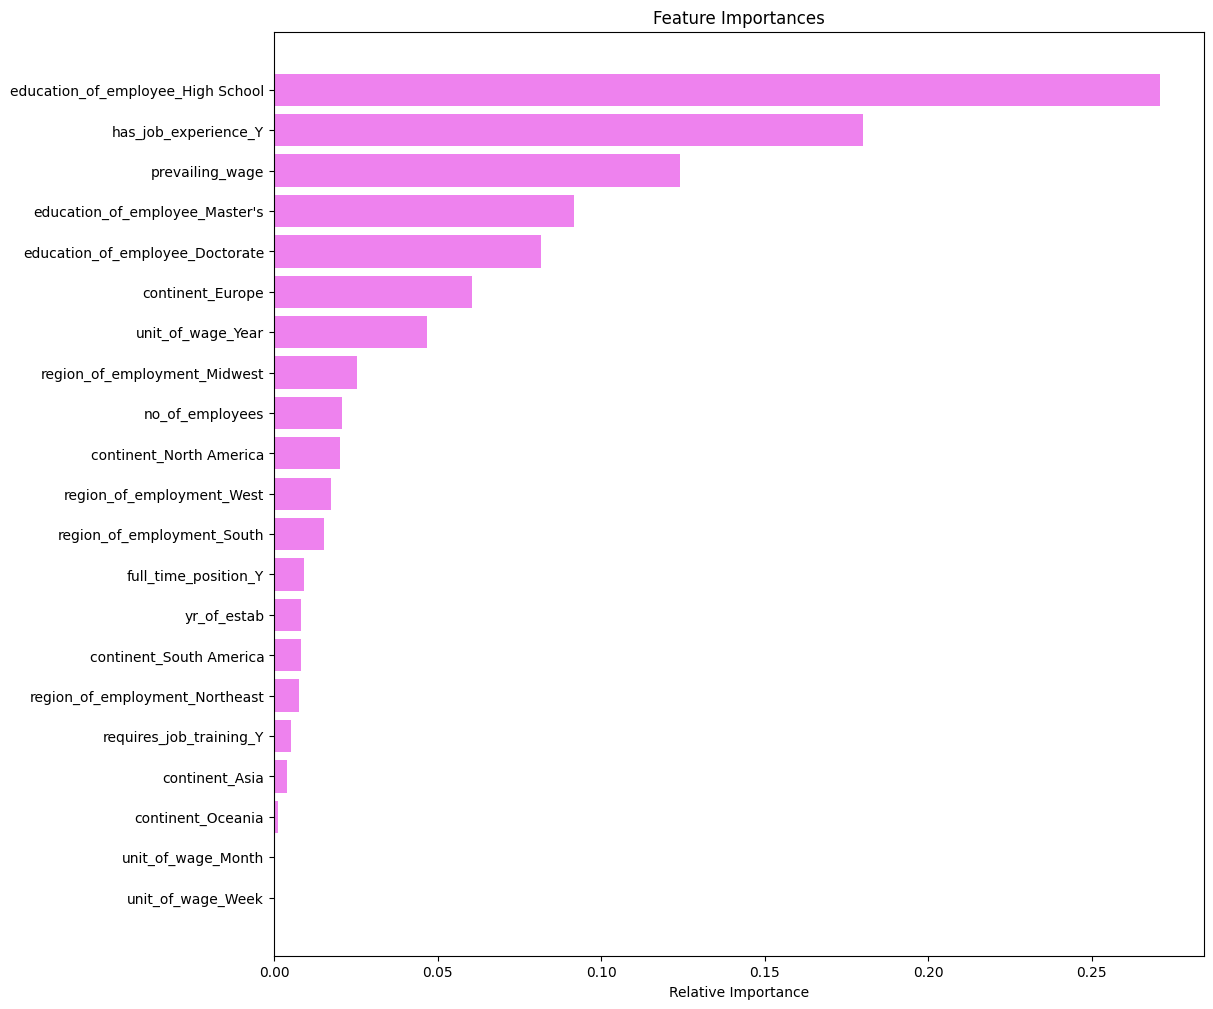

In [102]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [103]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df



Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664050,0.717295,0.696102,0.720827,0.727368,0.748038,0.738488,0.751047,0.751308,0.744244,0.733909,0.752486,0.757905
Recall,0.742184,0.931301,0.773061,0.930143,0.833655,0.878232,0.885951,0.873022,0.870513,0.888267,0.854110,0.864917,0.867354
Precision,0.757385,0.727794,0.777411,0.731189,0.779502,0.778481,0.765294,0.784191,0.785752,0.769861,0.775947,0.789919,0.788843
F1,0.749708,0.817066,0.775230,0.818753,0.805670,0.825354,0.821215,0.826226,0.825964,0.824836,0.813155,0.825718,0.826237


### Final Model:

Both Tuned AdaBoost Classifier and Stacking Classifier have the highest FI scores on the testing set 0.826 and generalised well on both training and testing set.

However, the Tuned Adaboost Classifer will be chosen as the final model because Recall is higher at 0.87.

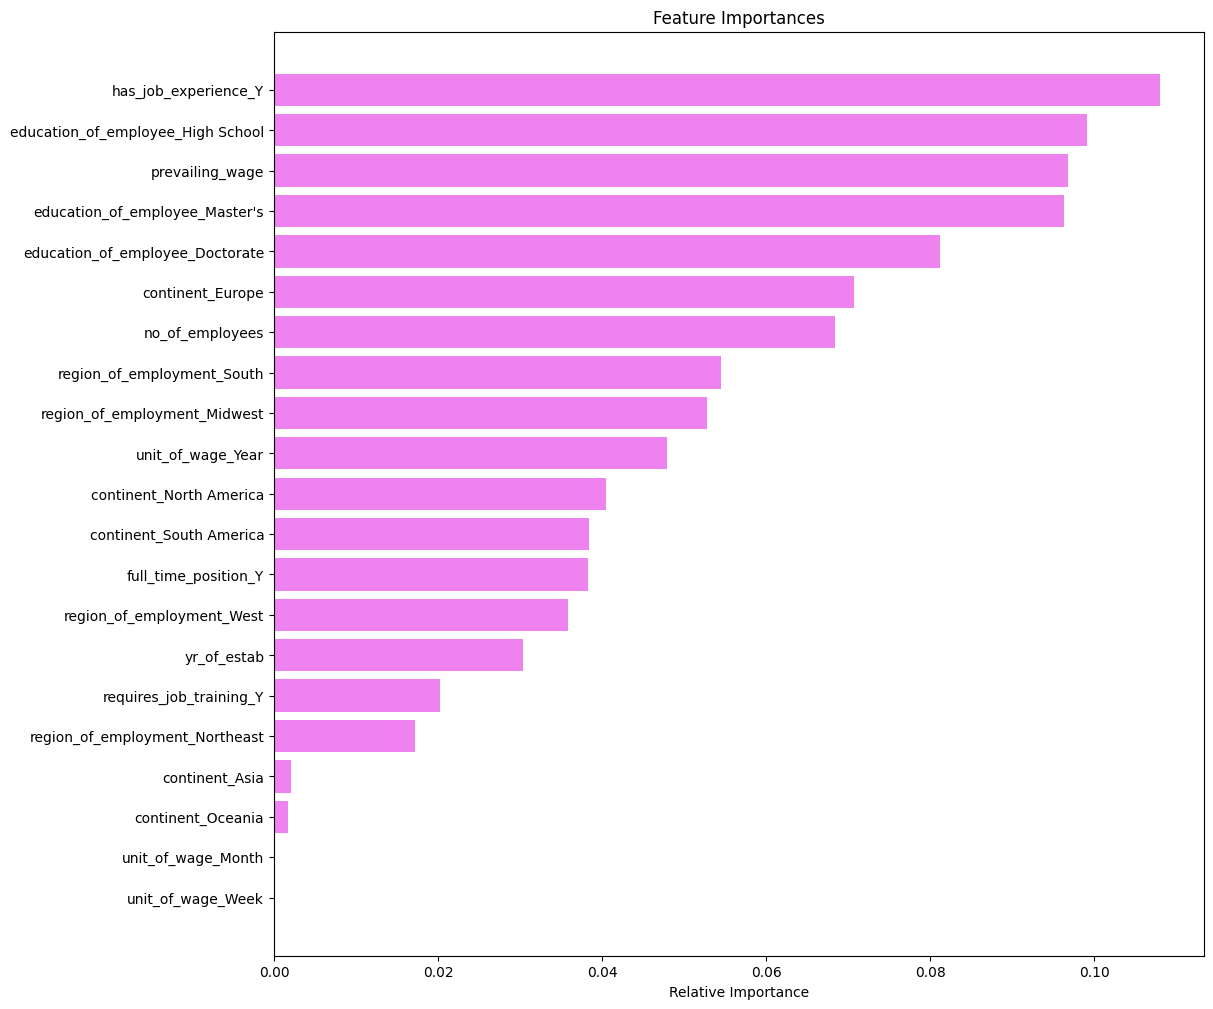

In [104]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are  basically experience and education

## Actionable Insights and Recommendations

**Insight:**

The AdaBoost Tuned model stood out as the top performer, achieving an impressive F1 score of 0.826.

Key determinants included the applicant's educational background and job experience.

**Recommendation:**

**Educational Background Influence:**

Decision tree analysis highlights that individuals with higher education, particularly doctorate degrees, are more likely to have their visas approved however masters degree got the highest percentage of certification.

Recommendation: Prioritize candidates with advanced degrees in the shortlisting process to increase the likelihood of visa approval.


**Continent-wise Analysis:**

Europe exhibits the highest visa approval rate, while South America has the lowest.

Recommendation:
 Customize marketing and outreach efforts to attract applicants from continents with historically lower approval rates, focusing on improving application quality.


**Work Experience Impact:**

Applicants with job experience demonstrate a higher approval-to-denial ratio.
Recommendation: Consider professional experience as a positive factor in the visa application process, favoring candidates with relevant work backgrounds.


**Unit of Wage Consideration:**

Applicants with hourly wages show a lower approval-to-denial ratio compared to other wage units.

Recommendation: Exercise caution when evaluating applications with hourly wage units, potentially subjecting them to additional scrutiny.


**Prevailing Wage and Visa Status:**

Prevailing wage significantly influences visa outcomes.

Recommendation: Align prevailing wage benchmarks with industry standards to ensure fair compensation for both local and foreign workers.


**Establishment Year Analysis:**

Companies established in the 1980s and 1990s correlate with a higher number of certified visas.


Recommendation: Investigate further to determine if the establishment year of companies impacts the credibility of visa applications.


**Model Performance and Feature Importance:**

AdaBoost Tuned model emerges as the top-performing model, emphasizing the importance of educational background and work experience.

Recommendation: Implement AdaBoost as the primary classification model, updating it regularly with new data to enhance predictive accuracy.


**Hyperparameter Tuning Insights:**

Hyperparameter tuning for some classifiers Bagging leads to marginal improvements.

Recommendation: Continue periodic fine-tuning of hyperparameters to optimize model performance and adapt to changing data dynamics.


**Stacking Model Insights:**

Stacking demonstrates a competitive F1 score with a high recall rate.

Recommendation: Explore incorporating ensemble models like stacking into the decision-making process to potentially improve overall prediction accuracy.


**Unexpected Factors:**

High school education and hourly wage are significant factors in visa denials.

Recommendation: Investigate underlying reasons for these trends and consider adjusting evaluation criteria or communication strategies accordingly.




By implementing these recommendations and proactively monitoring and adapting to changing trends, the organization can enhance its efficiency in shortlisting candidates with higher chances of visa approval, contributing to a streamlined and effective immigration process for both employers and applicants.





